In [1]:
from cycler import cycler
from os import listdir, stat
from os.path import isfile, join

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np


In [22]:
def filterr(df, col, val):
    return df[df[col] == val].reset_index(drop=True)


def filterrnot(df, col, val):
    return df[df[col] != val].reset_index(drop=True)


def filterrnz(df, col):
    return filterrnot(df, col, 0)


In [52]:
runs = pd.read_csv(f'res.csv')


In [53]:
def plot_line(xs, ys, label, color=None, marker=None, ax=None):
    if ax is None:
        ax = plt
    return ax.plot(xs, ys, label=label, color=color, marker=marker)


max_vl = runs['vl'].max()
vl_xticks = [2]
while vl_xticks[-1] < max_vl:
    vl_xticks.append(4*vl_xticks[-1])
vl_xticks = np.asarray(vl_xticks)


def setup_plot(title, xlabel, ylabel, ax=None, xscale='linear', xbase=10, yscale='linear', ybase=10, xticks=vl_xticks):
    if ax is not None:
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        if xscale != 'linear':
            ax.set_xscale(xscale, base=xbase)
        if yscale != 'linear':
            ax.set_yscale(yscale, base=ybase)
        if xticks is not None:
            ax.set_xticks(xticks)
        return

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xscale != 'linear':
        plt.xscale(xscale, base=xbase)
    if yscale != 'linear':
        plt.yscale(yscale, base=ybase)
    if xticks is not None:
        plt.xticks(xticks)


def grouped_bars(df, group_name, title, yname):
    bars_per_group = len(df.columns) - 1
    x = np.arange(len(df))
    width = 1 / (bars_per_group+1)

    offset_mult = 0
    fig, ax = plt.subplots(layout='constrained')

    for col in filter(lambda x: x != group_name, df.columns):
        offset = width * offset_mult
        rects = ax.bar(x + offset, df[col], width, label=col)
        ax.bar_label(rects, padding=3)
        offset_mult += 1

    ax.set_title(title)
    ax.set_ylabel(yname)
    ax.set_xticks(x + width, df[group_name])
    ax.legend()
    plt.show()


# def grouped_hists(df, group_name, bins_name, weights_name, title='', yname=''):
#     n_bins = len(set(df[bins_name]))
#     fig, ax = plt.subplots(layout='constrained')
#     ax.hist()


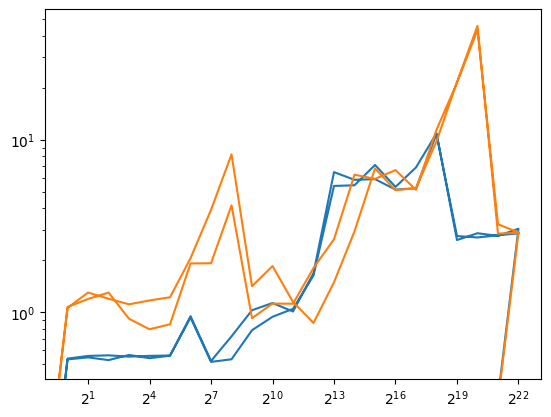

In [54]:
for lf in [2, 8]:
    d = filterr(runs, 'lf', lf)
    # d.sort_values('vl', inplace=True)
    plt.plot(d['vl'], d['search'])
    # break
plt.xscale('log', base=2)
plt.yscale('log')
plt.show()


In [69]:
profiles = [pd.read_csv(f'ssd-{i}/profile.csv') for i in range(1, 5)]


In [74]:
for i, p in enumerate(profiles):
    p['id'] = i+1


In [77]:
all_data = pd.concat(profiles).reset_index()


In [80]:
xs = [p['test'] for p in profiles]
ws = [p['time'] for p in profiles]


/var/folders/08/x9549q_j74x4hj2mlqb3dtgw0000gn/T/ipykernel_76377/3101010422.py:4: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate(rotation=270)


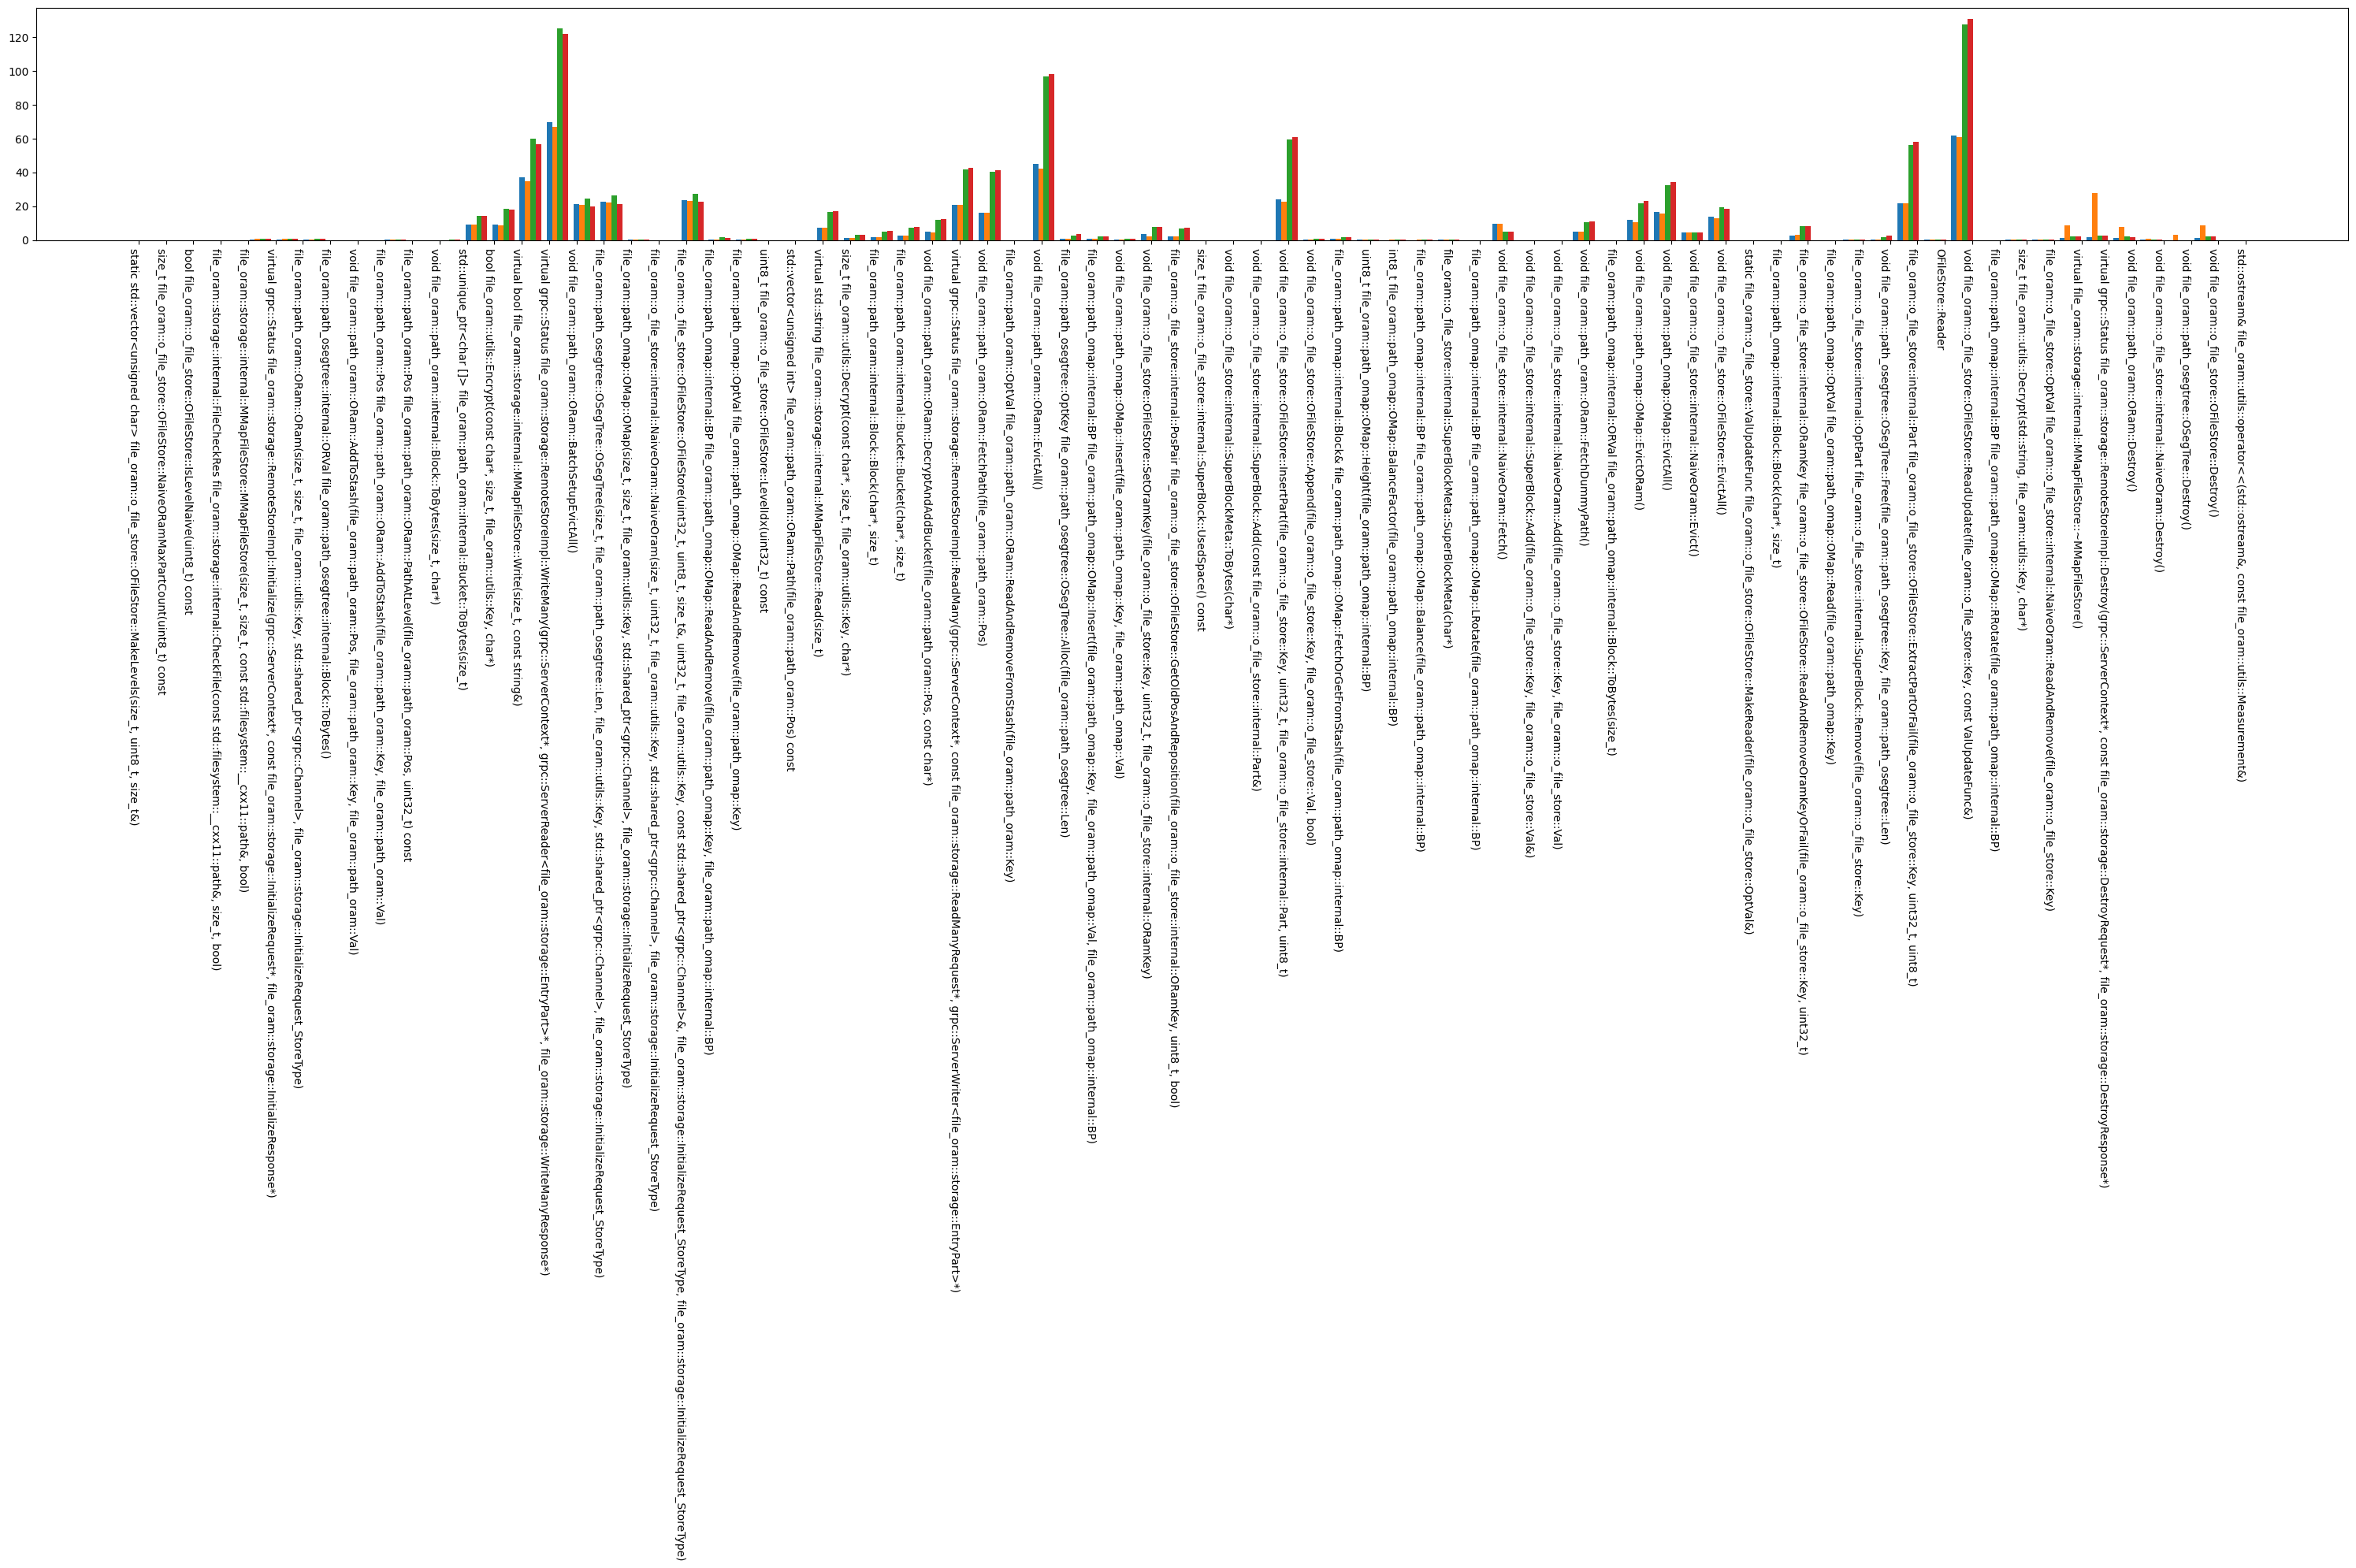

In [90]:
n_bins = len(set(all_data['test']))
fig, ax = plt.subplots(layout='constrained', figsize=(30, 20))
ax.hist(xs, weights=ws, bins=n_bins, histtype='bar')
fig.autofmt_xdate(rotation=270)
fig.tight_layout()
plt.show()


/var/folders/08/x9549q_j74x4hj2mlqb3dtgw0000gn/T/ipykernel_76377/3624661360.py:5: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate(rotation=270)


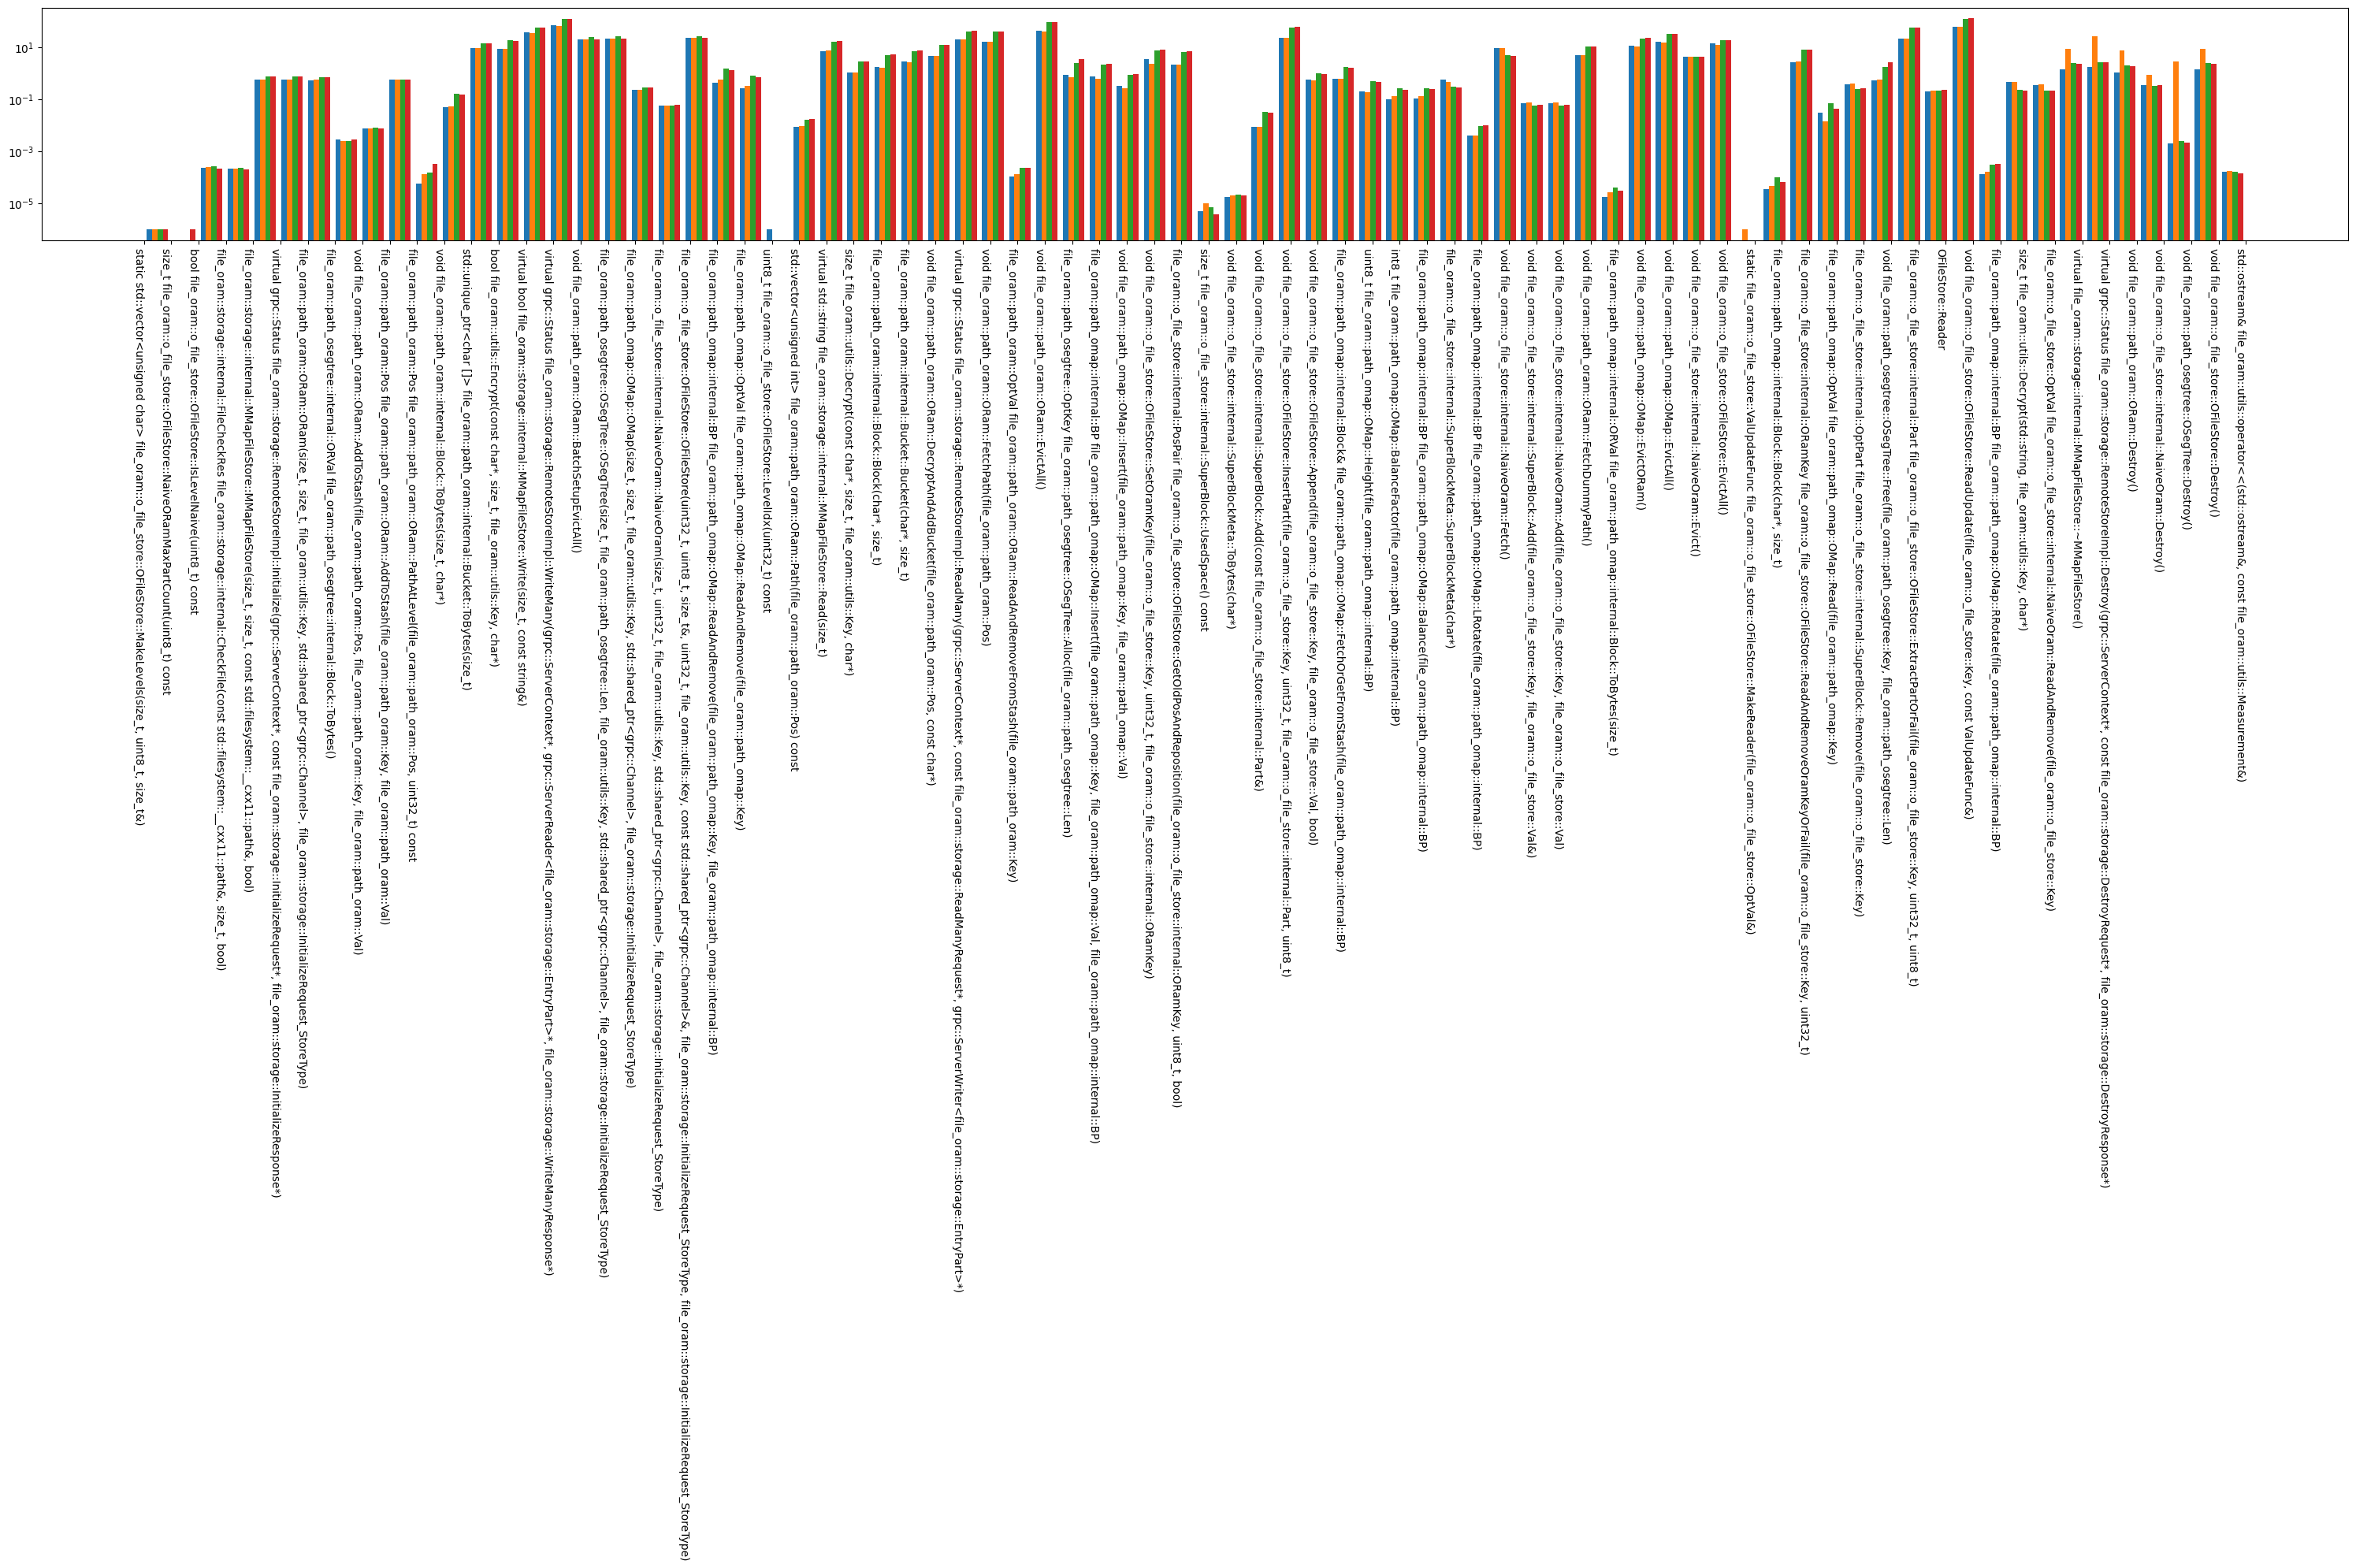

In [88]:
n_bins = len(set(all_data['test']))
fig, ax = plt.subplots(layout='constrained', figsize=(30, 20))
ax.hist(xs, weights=ws, bins=n_bins, histtype='bar')
ax.set_yscale('log')
fig.autofmt_xdate(rotation=270)
fig.tight_layout()
plt.show()
